In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import files
uploaded = files.upload()

Saving salary.csv to salary.csv


In [3]:
df_salary = pd.read_csv('salary.csv')
print(df_salary.head())

   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891


In [4]:
print(df_salary.isnull().sum())

YearsExperience    2
Salary             0
dtype: int64


In [5]:
mean_years_experience = df_salary['YearsExperience'].mean()
df_salary['YearsExperience'].fillna(mean_years_experience, inplace=True)

<ipython-input-5-6f5a7e93c601>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_salary['YearsExperience'].fillna(mean_years_experience, inplace=True)


In [6]:
print(df_salary.isnull().sum())

YearsExperience    0
Salary             0
dtype: int64


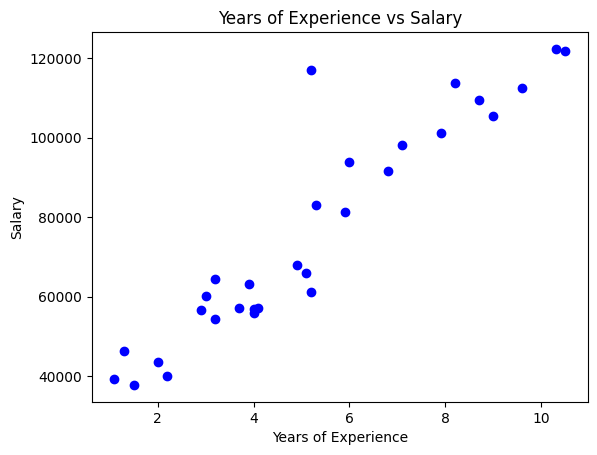

In [7]:
plt.scatter(df_salary['YearsExperience'], df_salary['Salary'], color='blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of Experience vs Salary')
plt.show()

In [8]:
X_salary = df_salary['YearsExperience'].values.reshape(-1, 1)  # Independent variable (Years of Experience)
y_salary = df_salary['Salary'].values  # Dependent variable (Salary)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_salary, y_salary, test_size=0.2, random_state=42)

In [10]:
salary_model = LinearRegression()
salary_model.fit(X_train, y_train)

LinearRegression()

In [11]:
predicted_salary_12_years = salary_model.predict([[12]])
print(f"Predicted salary for 12 years of experience: ${predicted_salary_12_years[0]:.2f}")

Predicted salary for 12 years of experience: $139500.53


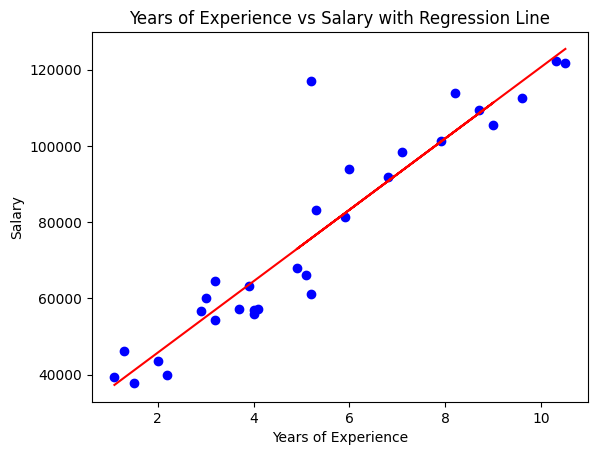

In [12]:
plt.scatter(df_salary['YearsExperience'], df_salary['Salary'], color='blue')
plt.plot(df_salary['YearsExperience'], salary_model.predict(X_salary), color='red')  # Regression line
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of Experience vs Salary with Regression Line')
plt.show()